In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import wandb
import matplotlib as mpl

In [2]:
cd ..

/home/rd804/discriminator-metric


Index(['pt', 'eta', 'mass', 'num_particles'], dtype='object')


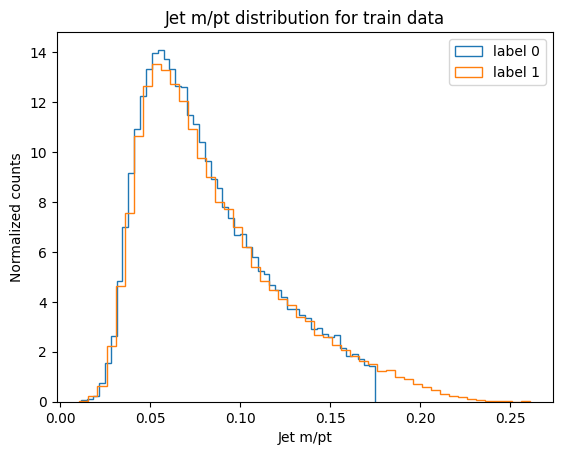

Index(['pt', 'eta', 'mass', 'num_particles'], dtype='object')


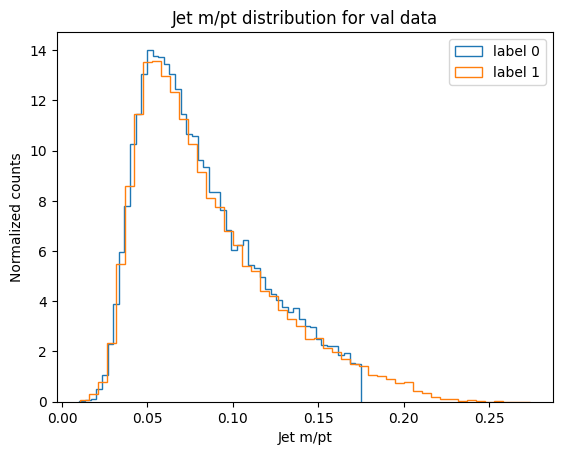

In [3]:
split = ['train','val']

for s in split:
        data = pd.read_hdf('data/jetnet_data.h5', f'jet_data_{s}')
        labels = pd.read_hdf('data/jetnet_data.h5', f'labels_{s}')['labels']
        #labels = f[f'labels_{s}']
        print(data.keys())
        pt = data['pt']
        m = data['mass']
        m_pt = m/pt
        #assert len(data) == len(labels)

        figure = plt.figure()

        plt.hist(m_pt[labels==0], bins=50, 
                 histtype='step', label='label 0',density=True)
        plt.hist(m_pt[labels==1], bins=50, 
                 histtype='step', label='label 1', density=True)
        plt.legend()
        plt.xlabel('Jet m/pt')
        plt.ylabel('Normalized counts')
        plt.title(f'Jet m/pt distribution for {s} data')
        plt.show()







# Verify conversion

In [4]:
from scripts.conversion import *

(121793,)
(121793, 4)


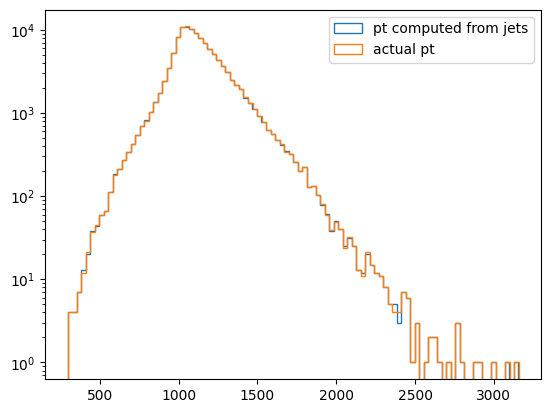

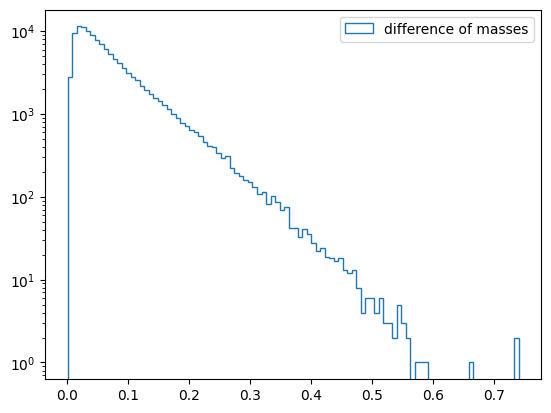

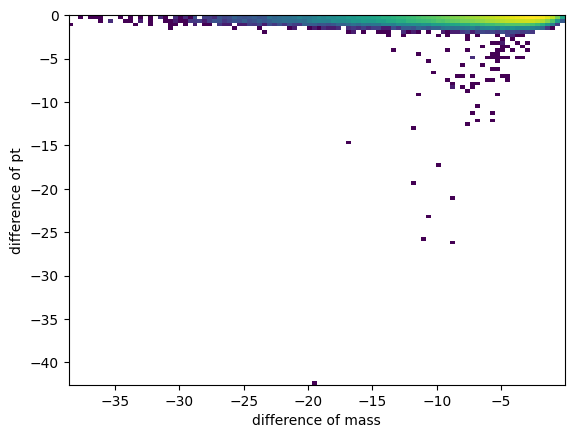

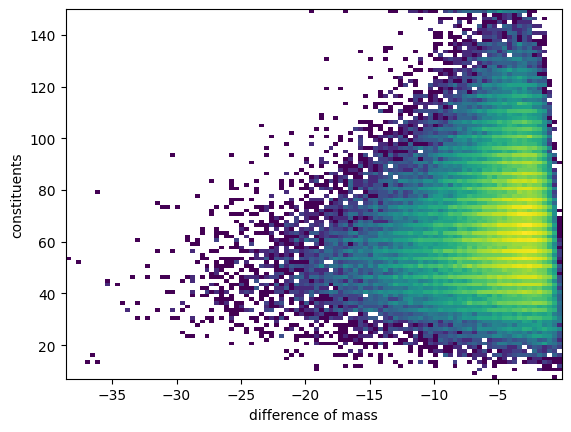

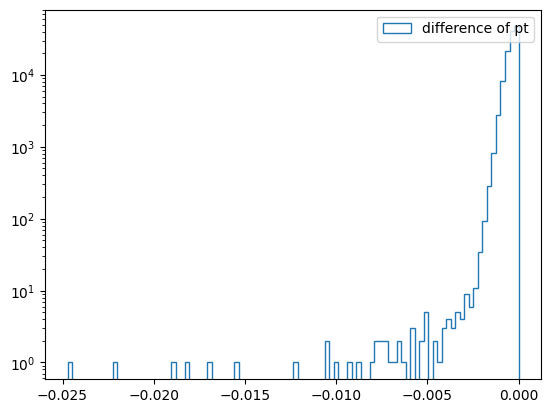

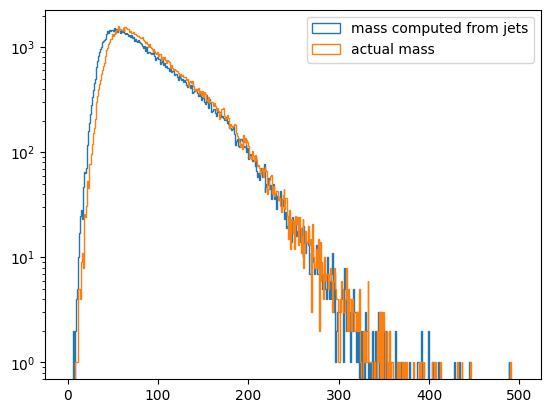

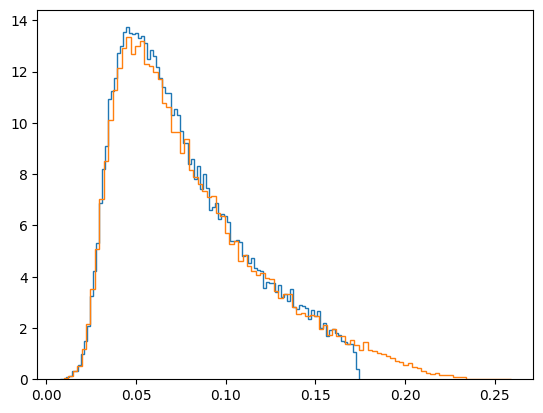

(52158,)
(52158, 4)


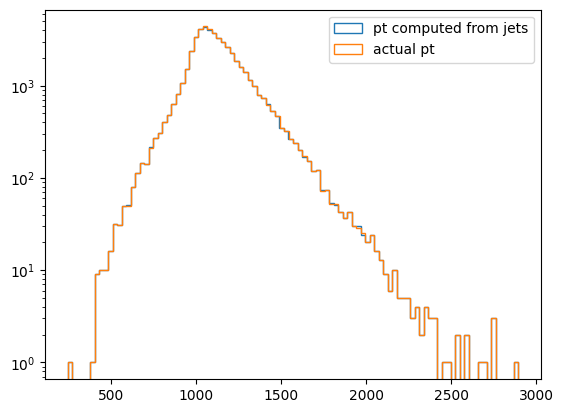

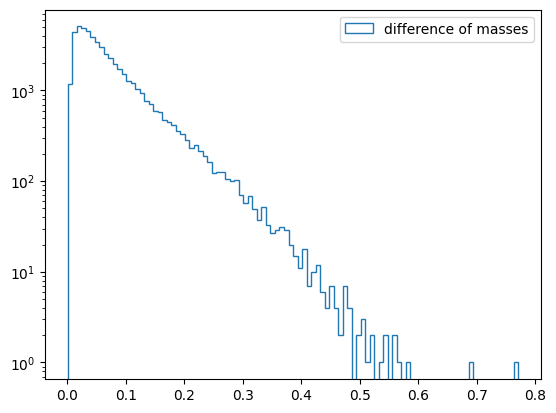

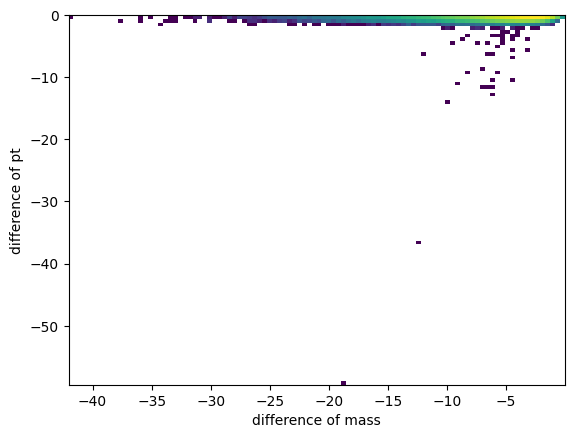

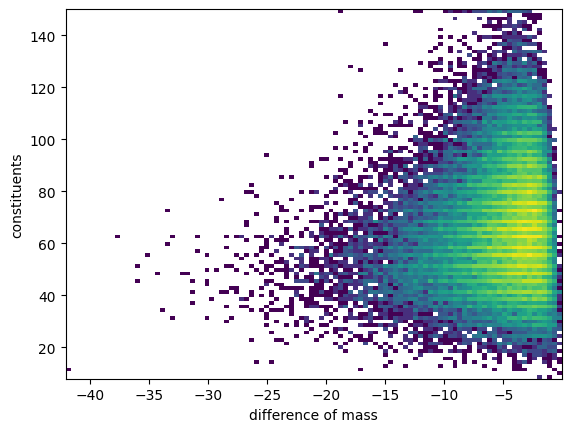

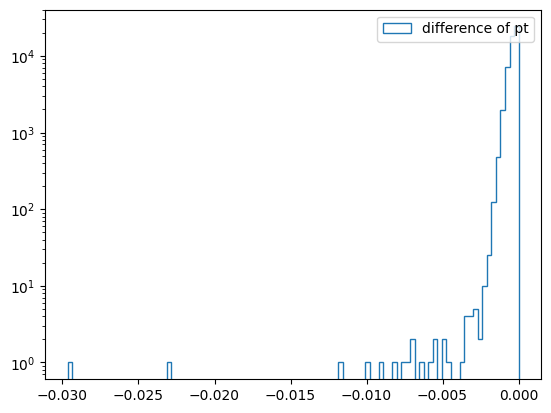

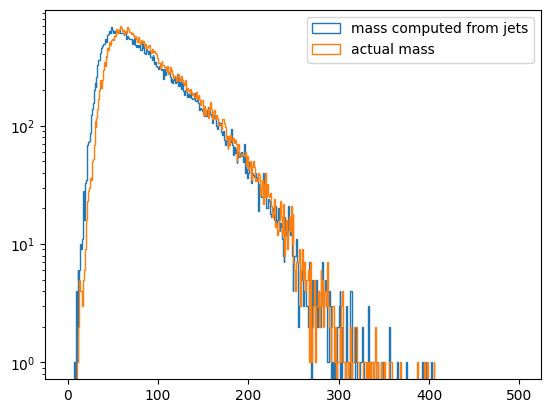

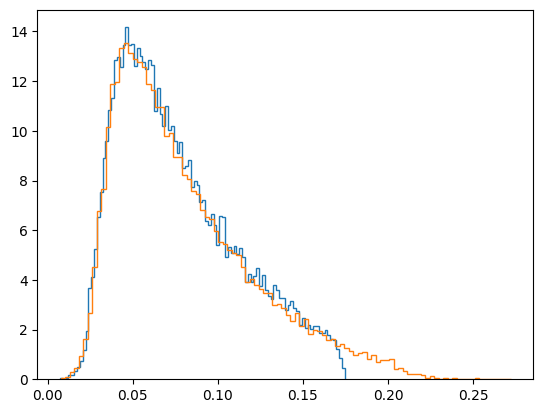

In [9]:
for s in split:
    data = pd.read_hdf('data/jetnet_data.h5', f'jet_data_{s}')
    particle_data = pd.read_hdf('data/jetnet_data.h5', f'particle_data_{s}').values.reshape(-1,150,4)
    labels = pd.read_hdf('data/jetnet_data.h5', f'labels_{s}')['labels']
    print(labels.shape)
    
    print(data.shape)
    mass_particle = mjj_jets(particle_data)
    pt_particle = pt_jets(particle_data)

    diff_mass = mass_particle - data['mass'].values
    diff_pt = pt_particle - data['pt'].values

    #plt.hist(diff_mass, bins=50, histtype='step', label='mass', density=True)
    plt.hist(pt_particle, bins=100, histtype='step', label='pt computed from jets')
    plt.hist(data['pt'], bins=100, histtype='step', label='actual pt')
    plt.yscale('log')
    plt.legend()
    plt.show()

    plt.hist(np.abs(diff_mass)/data['mass'], bins=100, histtype='step', label='difference of masses')
    plt.yscale('log')
    plt.legend()
    plt.show()

    plt.hist2d(diff_mass, diff_pt, bins=100,norm=mpl.colors.LogNorm() )
    plt.xlabel('difference of mass')
    plt.ylabel('difference of pt')
    plt.show()

    plt.hist2d(diff_mass, data['num_particles'], bins=100,norm=mpl.colors.LogNorm() )
    plt.xlabel('difference of mass')
    plt.ylabel('constituents')
    plt.show()

    plt.hist(diff_pt/data['pt'], bins=100, histtype='step', label='difference of pt')
    plt.yscale('log')
    plt.legend()
    plt.show()


    plt.hist(mass_particle, bins=np.arange(0,500,1), histtype='step', label='mass computed from jets')
    plt.hist(data['mass'], bins=np.arange(0,500,1), histtype='step', label='actual mass')
    plt.yscale('log')
    plt.legend()
    plt.show()



    plt.hist((mass_particle/pt_particle)[labels==0], bins=100, histtype='step', label='label 0'
             ,density=True)
    plt.hist((mass_particle/pt_particle)[labels==1], bins=100, histtype='step', label='label 1'
             ,density=True)

    plt.show()



    

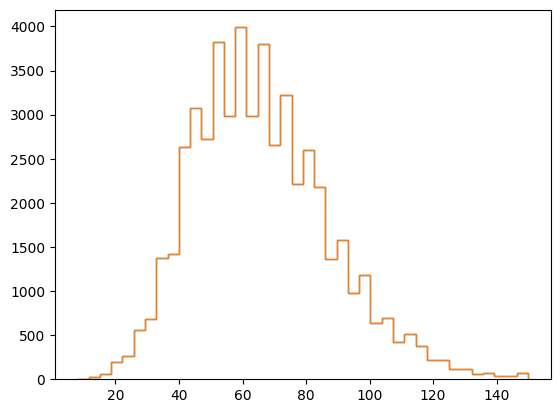

In [6]:
particle_data_len = np.sum((particle_data[...,2]!=0)*1,axis=1)

plt.hist(particle_data_len, bins=40, histtype='step', label='particle')
plt.hist(data['num_particles'].values, bins=40,histtype='step', label='actual')
plt.show()

In [7]:
particle_data

array([[[ 1.29299820e+02,  8.90019684e+01, -1.64845359e+00,
         -9.37783279e+01],
        [ 1.25472916e+02,  8.56737442e+01,  2.60021782e+00,
         -9.16335068e+01],
        [ 9.59775162e+01,  6.66714172e+01,  1.54705358e+00,
         -6.90232773e+01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00]],

       [[ 1.08063416e+02,  1.08047554e+02,  8.94721806e-01,
         -1.62082958e+00],
        [ 8.74499283e+01,  8.74076920e+01,  9.49483514e-01,
         -2.54616332e+00],
        [ 7.64300308e+01,  7.64096756e+01,  4.91304457e-01,
         -1.69387782e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.000